In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import transformers
from scipy.stats import chi2_contingency
import scipy

In [81]:
philly_reviews = []

with open('philadelphia_reviews.json') as json_data:
    data = json.load(json_data)
    count = 0 
    for val in data: 
        philly_reviews.extend(data[val])
        count += len(data[val])
        if count >= 30000: break
    philly = pd.DataFrame(philly_reviews)
philly

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
1,HME_ksGph3se7Aze5hxa-Q,kSMOJwJXuEUqzfmuFncK4A,kxX2SOes4o-D3ZQBkiMRfA,2.0,0,0,1,Dine-in gets 2 stars. Disappointing service & ...,2014-07-13 17:25:47
2,EJWyA5wpdVMji1j4TwSZqQ,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5.0,13,6,5,After a long hiatus from reviewing I have awak...,2010-08-20 19:16:04
3,T_kAb2NeylB-JdNDKphryw,Z-xgVb4nM42943m2wbBkFw,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,1,1,We've eaten here 3 times and it seems that eac...,2017-01-02 14:25:26
4,NENaCqb6TNj5CyY1LOdI6Q,2SEoXb6r6hPKrl9V9VzBgA,kxX2SOes4o-D3ZQBkiMRfA,5.0,0,0,0,Came to Philly for a family event but stayed a...,2015-07-28 17:15:20
...,...,...,...,...,...,...,...,...,...
30058,kROtd9eXnrIL-1VLSICqxg,tm48CF3WIXBgHD4JLjQIwA,p1PQZFieSwQVd3PPtuaL8A,1.0,0,0,0,We were celebrating a birthday dinner at Core ...,2012-02-29 02:40:51
30059,VgHrmO7qJF-vfsdbL5mD8w,y0MwqMMYGt9lvQQsFVB-ug,p1PQZFieSwQVd3PPtuaL8A,4.0,0,0,0,We were on South Street and I mentioned to my ...,2013-06-24 00:22:04
30060,J1D8ruUYcMS1-zItUoPr9g,-OZPBHH7RzyPIai4AlPWKA,p1PQZFieSwQVd3PPtuaL8A,4.0,3,1,2,I'm a fan of the fettucini in bolognese sauce ...,2013-06-24 00:17:27
30061,vezgOqQGzUdo18-9qcypRw,dZukfy_20W5oVZ7ESfpMog,p1PQZFieSwQVd3PPtuaL8A,5.0,0,0,0,Get the specials. Great drinks good pour on th...,2012-05-23 21:12:47


In [5]:
reviews = []
with open('santa_barbara_reviews.json') as json_data:
    data = json.load(json_data)
    count = 0
    for val in data: 
        reviews.extend(data[val][:75])
        count += len(data[val])
        if count >= 30000: break  
    sb = pd.DataFrame(reviews)
sb

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,zM7u3iffMjniyvQAaN9Tnw,QacYrFyCrFLmC726YEEBsA,29YqJwOGEuAWqlHZxMc1OA,1.0,0,1,0,So disappointing on so many levels. Have been ...,2012-05-29 03:51:08
1,wh9ea5TEl4oKiSr2k_R1eA,bnDnNy1RaJXY-12Sh3D0WA,29YqJwOGEuAWqlHZxMc1OA,4.0,1,0,1,We were on our way home from a camping trip an...,2016-01-04 03:55:32
2,mcVDsGVUncpg6LJeZ961NQ,eE44UBdsymNSnaMnIDwwOQ,29YqJwOGEuAWqlHZxMc1OA,4.0,0,0,1,My wife and I have been coming to Paradise for...,2016-06-22 21:51:45
3,T348a5HPcv00_jxnlSZe-w,a_iFcnIHwsb9ww81kRYirA,29YqJwOGEuAWqlHZxMc1OA,5.0,0,0,0,Been here twice...once just for drinks and onc...,2014-07-28 05:56:16
4,TYslH-CAecjJxLNs96KduA,XCsZ3hWa_6oP1WkWvK7pmg,29YqJwOGEuAWqlHZxMc1OA,5.0,0,0,0,Lovely little restaurant which was converted f...,2005-03-01 17:47:15
...,...,...,...,...,...,...,...,...,...
24071,0hAjxTohK8zyHP5JjU-qwQ,LcBZt_bpU5CqwtDJwB3OCg,hlb7WwqcCijqqbp8zye1dw,5.0,20,10,16,This is Santa Barbara's first Roman style pizz...,2020-07-11 21:04:24
24072,BgP9asdE9RWcDklVkhzXaA,ZyTB3nkpaZuU8ddv9i_toQ,hlb7WwqcCijqqbp8zye1dw,5.0,0,1,0,"Great pizza: Sauce is good, fresh - not grea...",2020-09-03 02:02:19
24073,UBmtceIrLfB96IuMaGVN1w,3X9h2zkRINq6DnpkxJEhVw,hlb7WwqcCijqqbp8zye1dw,5.0,0,0,1,"By far the best pizza in town! Great toppings,...",2020-12-14 02:24:05
24074,v6G4YnGE2ZaSK84r2O8svA,Dft_H62Zz6-SmsMg74SEOQ,hlb7WwqcCijqqbp8zye1dw,4.0,0,0,0,Excellent pizza! My favorite part is by far th...,2020-08-14 22:04:44


## Model 1: Text Classification (Emotion)

In [7]:
with open('sentiment_classifications/philly_emotion_classification.json') as json_data:
    data = json.load(json_data)
    philly_emotion = pd.DataFrame(data)

with open('sentiment_classifications/sb_emotion_classification.json') as json_data:
    data = json.load(json_data)
    sb_emotion = pd.DataFrame(data)


In [3]:
with open('sentiment_classifications/indianapolis_emotion_classification.json') as json_data:
    data = json.load(json_data)
    indy_emotion = pd.DataFrame(data)

with open('sentiment_classifications/new_orleans_emotion_classification.json') as json_data:
    data = json.load(json_data)
    newo_emotion = pd.DataFrame(data)

with open('sentiment_classifications/tampa_emotion_classification.json') as json_data:
    data = json.load(json_data)
    tampa_emotion = pd.DataFrame(data)



In [5]:
biz_to_cuisine = {}
def get_cuisine_biz_mapping(filename):
    with open(filename, 'r') as file:
        for line in file:
            all_businesses = json.loads(line)
            break
    for b in all_businesses.keys():
        cur = all_businesses[b]
        categories = cur['categories']
        if categories:
            categories = cur['categories'].split(",")
            for category in categories:
                cat = category.strip()
                if cat != 'Restaurants' and cat != 'Bakeries' and cat != 'Bars' and cat != 'Coffee' and cat != 'Tea' and cat !='Ethnic Food':
                    biz_to_cuisine[cur['business_id']] = cat
                    break
        else:
            biz_to_cuisine[cur['business_id']] = "None"

get_cuisine_biz_mapping('businesses/philadelphia_businesses.json')
get_cuisine_biz_mapping('businesses/santa_barbara_businesses.json')
get_cuisine_biz_mapping('businesses/indianapolis_businesses.json')
get_cuisine_biz_mapping('businesses/new_orleans_businesses.json')
get_cuisine_biz_mapping('businesses/tampa_businesses.json')

        


In [8]:
def generate_cuisine_col(city_df):
    cuisines = []
    for index, row in city_df.iterrows():
        if row['business_id'] in biz_to_cuisine:
            cuisines.append(biz_to_cuisine[row['business_id']])
        else:
            cuisines.append("None")
    city_df['cuisine'] = cuisines
    
generate_cuisine_col(philly_emotion)
generate_cuisine_col(sb_emotion)
generate_cuisine_col(tampa_emotion)
generate_cuisine_col(newo_emotion)
generate_cuisine_col(indy_emotion)


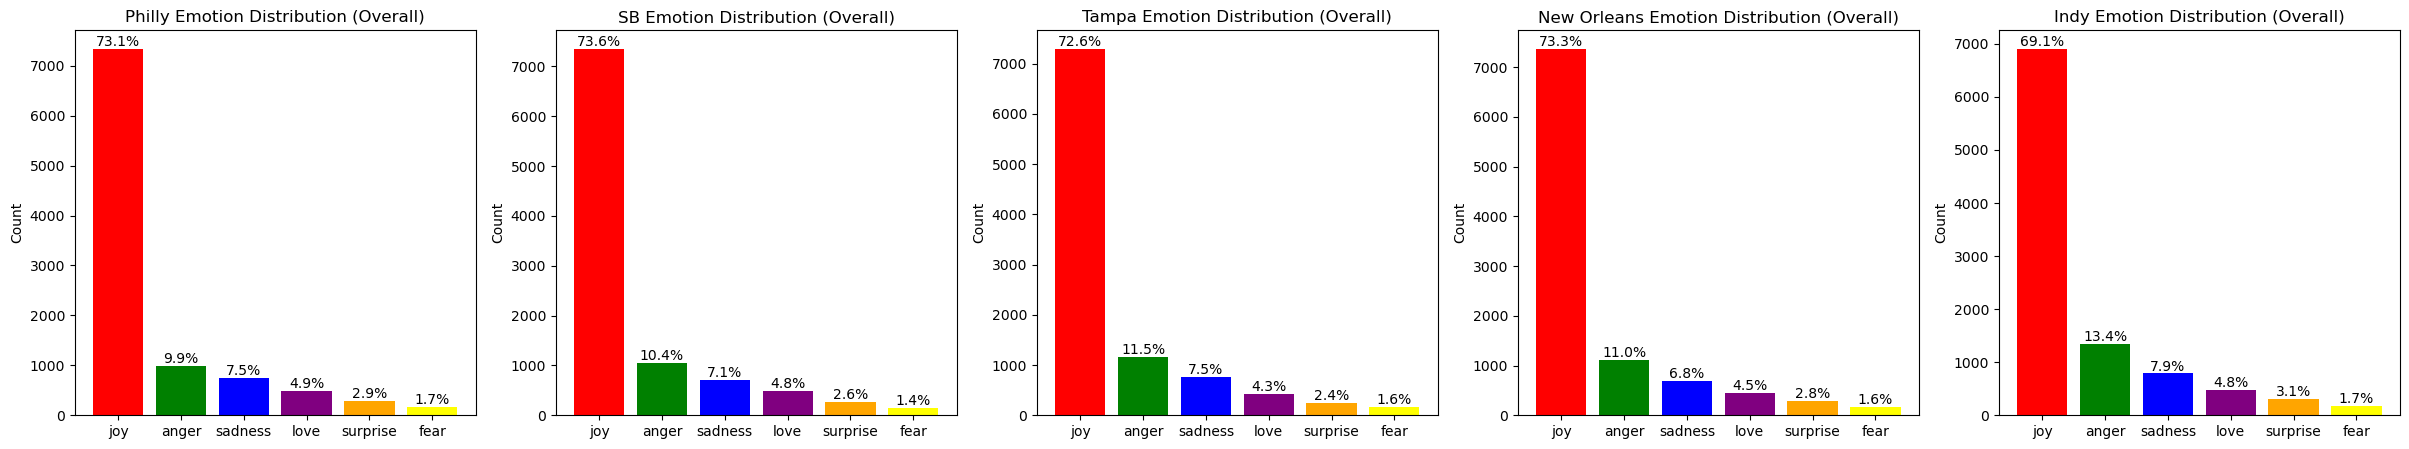

In [44]:
cities = [philly_emotion, sb_emotion, tampa_emotion, newo_emotion, indy_emotion]
names = ['Philly', 'SB', 'Tampa', 'New Orleans', 'Indy']
fig, axes = plt.subplots(ncols=5, nrows = 1, figsize=(30, 5))

for x in range(len(cities)):
    counts = cities[x]['classification'].value_counts()
    category_percentages = counts / len(cities[x]) * 100
    bars = axes[x].bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
    for bar, percentage in zip(bars, category_percentages):
        yval = bar.get_height()
        axes[x].text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
    title = names[x]+' Emotion Distribution (Overall)'
    axes[x].set_title(title)
    axes[x].set_ylabel('Count')

plt.show()
plt.close()


In [63]:
def get_cuisine_visualization(cuisine):
    cities = [philly_emotion, sb_emotion, tampa_emotion, newo_emotion, indy_emotion]
    names = ['Philly', 'SB', 'Tampa', 'New Orleans', 'Indy']
    fig2, axes2 = plt.subplots(ncols=5, nrows = 1, figsize=(30, 5))
    query_string = "cuisine=='"+cuisine+"'"
    for x in range(len(cities)):
        temp = cities[x].query(query_string)
        counts = temp['classification'].value_counts()
        category_percentages = counts / len(temp) * 100
        bars = axes2[x].bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
        for bar, percentage in zip(bars, category_percentages):
            yval =bar.get_height()
            axes2[x].text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
        title = names[x]+' Emotion Distribution: '+cuisine
        axes2[x].set_title(title)
        axes2[x].set_ylabel('Count')
    plt.show()
    plt.close()



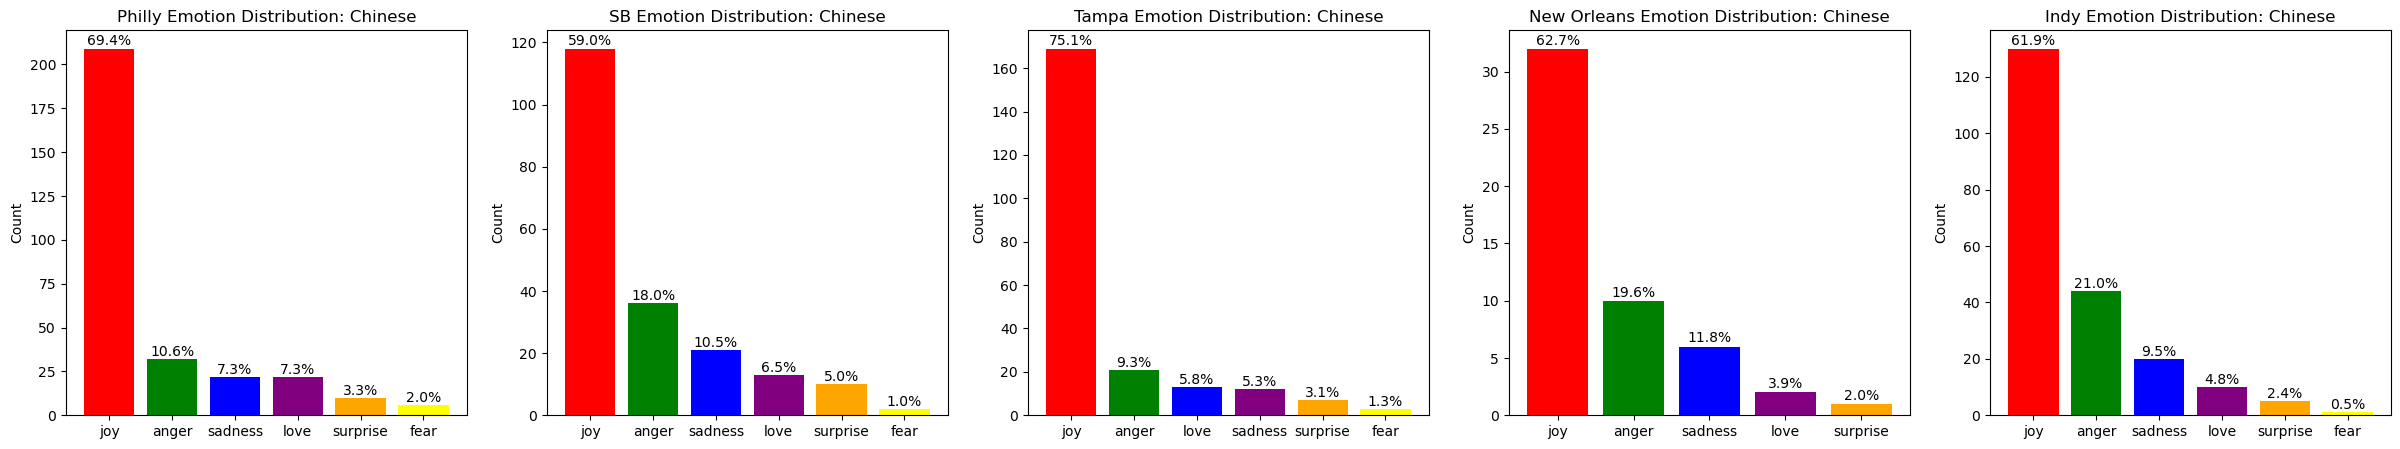

In [64]:
get_cuisine_visualization('Chinese')

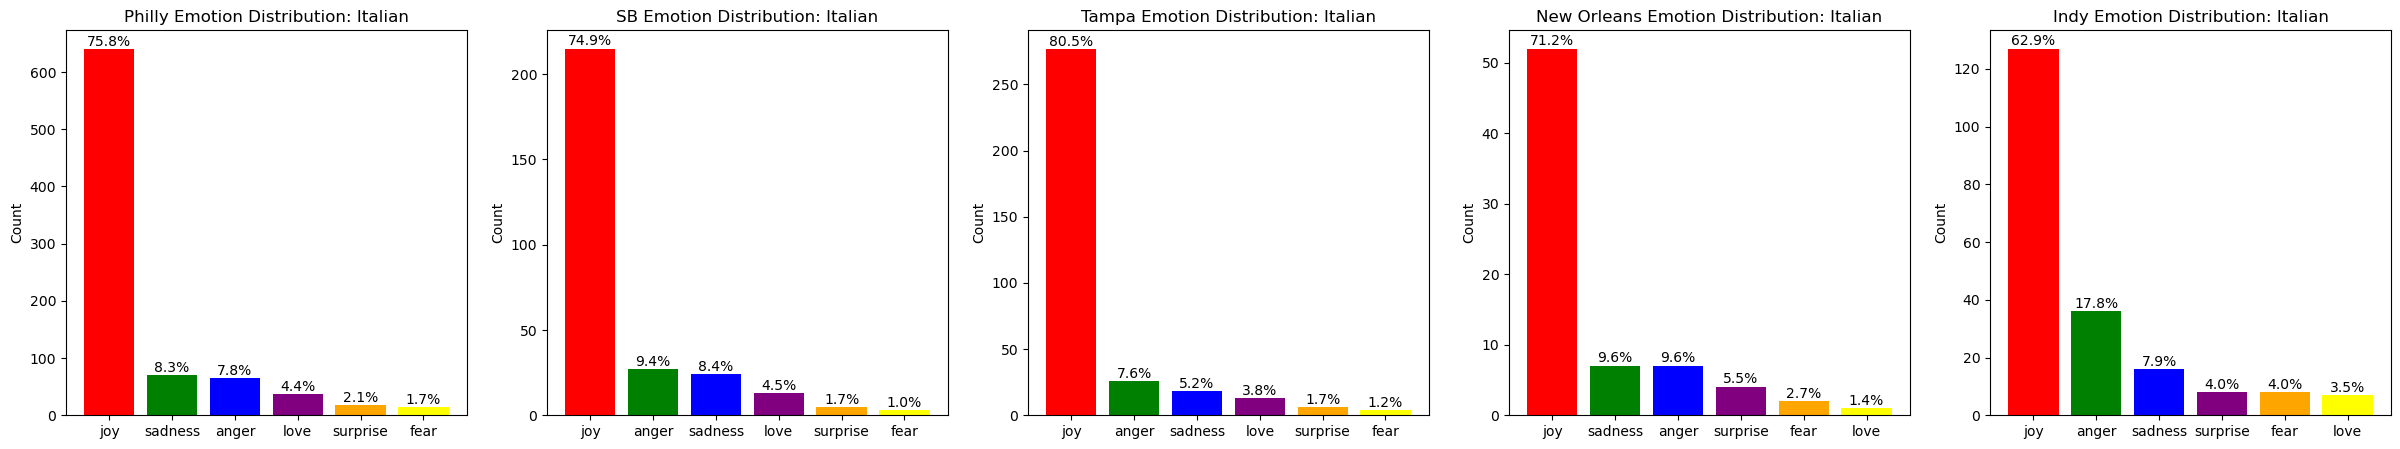

In [67]:
get_cuisine_visualization('Italian')

# Model 2: Text Classification (Positive/Negative)

In [69]:
def create_posneg_dfs(filename):
    with open(filename) as json_data:
        data = json.load(json_data)
        df = pd.DataFrame(data)
    df["classification"]= df.apply(lambda x: x['classification'].replace('LABEL_1', "Positive"), axis=1)
    df["classification"]= df.apply(lambda x: x['classification'].replace('LABEL_0', "Negative"), axis=1)
    return df
philly_revs = create_posneg_dfs('sentiment_classifications/philadelphia_review_classification.json')
sb_revs = create_posneg_dfs('sentiment_classifications/sb_review_classification.json')
indy_revs = create_posneg_dfs('sentiment_classifications/indianapolis_review_classification.json')
tampa_revs = create_posneg_dfs('sentiment_classifications/tampa_review_classification.json')
newo_revs = create_posneg_dfs('sentiment_classifications/new_orleans_review_classification.json')



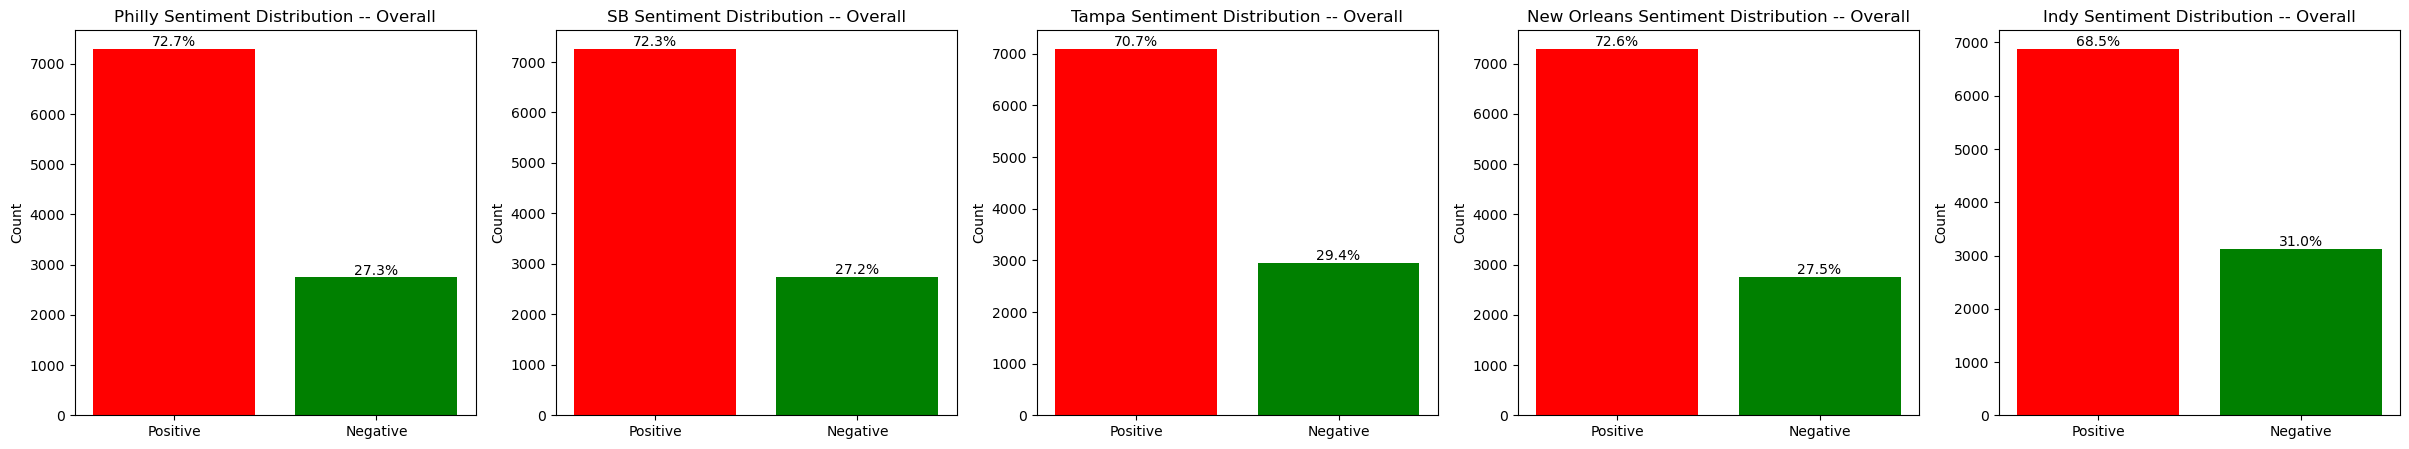

In [108]:
def overall_posneg():
    cities = [philly_revs, sb_revs, tampa_revs, newo_revs, indy_revs]
    names = ['Philly', 'SB', 'Tampa', 'New Orleans', 'Indy']
    fig2, axes2 = plt.subplots(ncols=5, nrows = 1, figsize=(30, 5))
    for x in range(len(cities)):
        counts = cities[x]['classification'].value_counts()
        category_percentages = counts / len(philly) * 100
        bars = axes2[x].bar(counts.index, counts, color=['red', 'green', 'blue', 'purple','orange','yellow'])
        for bar, percentage in zip(bars, category_percentages):
            yval = bar.get_height()
            axes2[x].text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
        title =str(names[x])+' Sentiment Distribution -- Overall'
        axes2[x].set_title(title)
        axes2[x].set_ylabel('Count')
    plt.show()
overall_posneg()


In [75]:
generate_cuisine_col(philly_revs)
generate_cuisine_col(sb_revs)
generate_cuisine_col(tampa_revs)
generate_cuisine_col(indy_revs)
generate_cuisine_col(newo_revs)

In [93]:
print(len(sb_revs.query("cuisine=='Chinese'")))

200


In [76]:
def get_cuisine_visualization_posneg(cuisine):
    cities = [philly_revs, sb_revs, tampa_revs, newo_revs, indy_revs]
    names = ['Philly', 'SB', 'Tampa', 'New Orleans', 'Indy']
    fig2, axes2 = plt.subplots(ncols=5, nrows = 1, figsize=(30, 5))
    query_string = "cuisine=='"+cuisine+"'"
    for x in range(len(cities)):
        temp = cities[x].query(query_string)
        counts = temp['classification'].value_counts()
        category_percentages = counts / len(temp) * 100
        bars = axes2[x].bar(counts.index, counts, color=['red', 'green'])
        for bar, percentage in zip(bars, category_percentages):
            yval =bar.get_height()
            axes2[x].text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{percentage:.1f}%', ha='center', va='bottom')
        title = names[x]+' PosNeg Distribution: '+cuisine
        axes2[x].set_title(title)
        axes2[x].set_ylabel('Count')
    plt.show()
    plt.close()


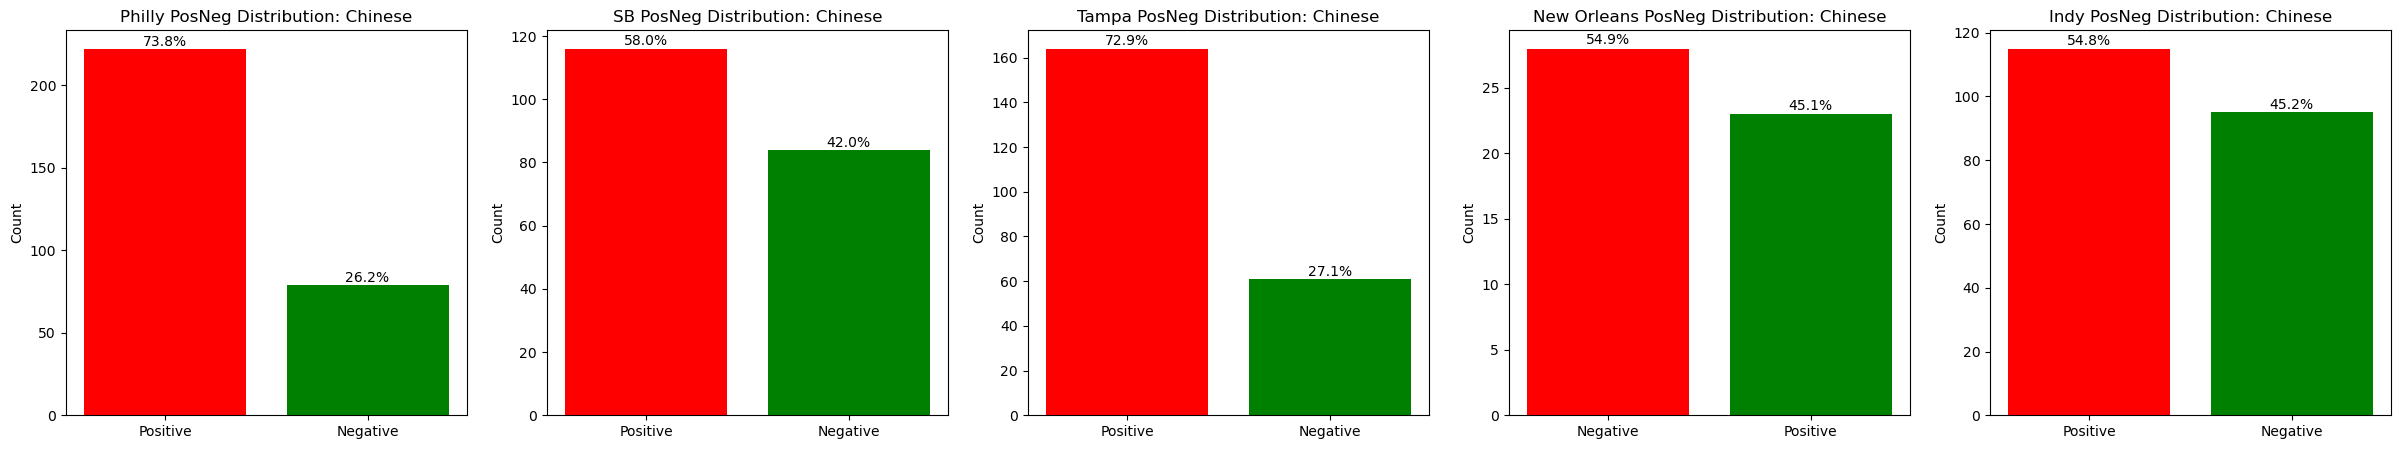

In [77]:
get_cuisine_visualization_posneg("Chinese")

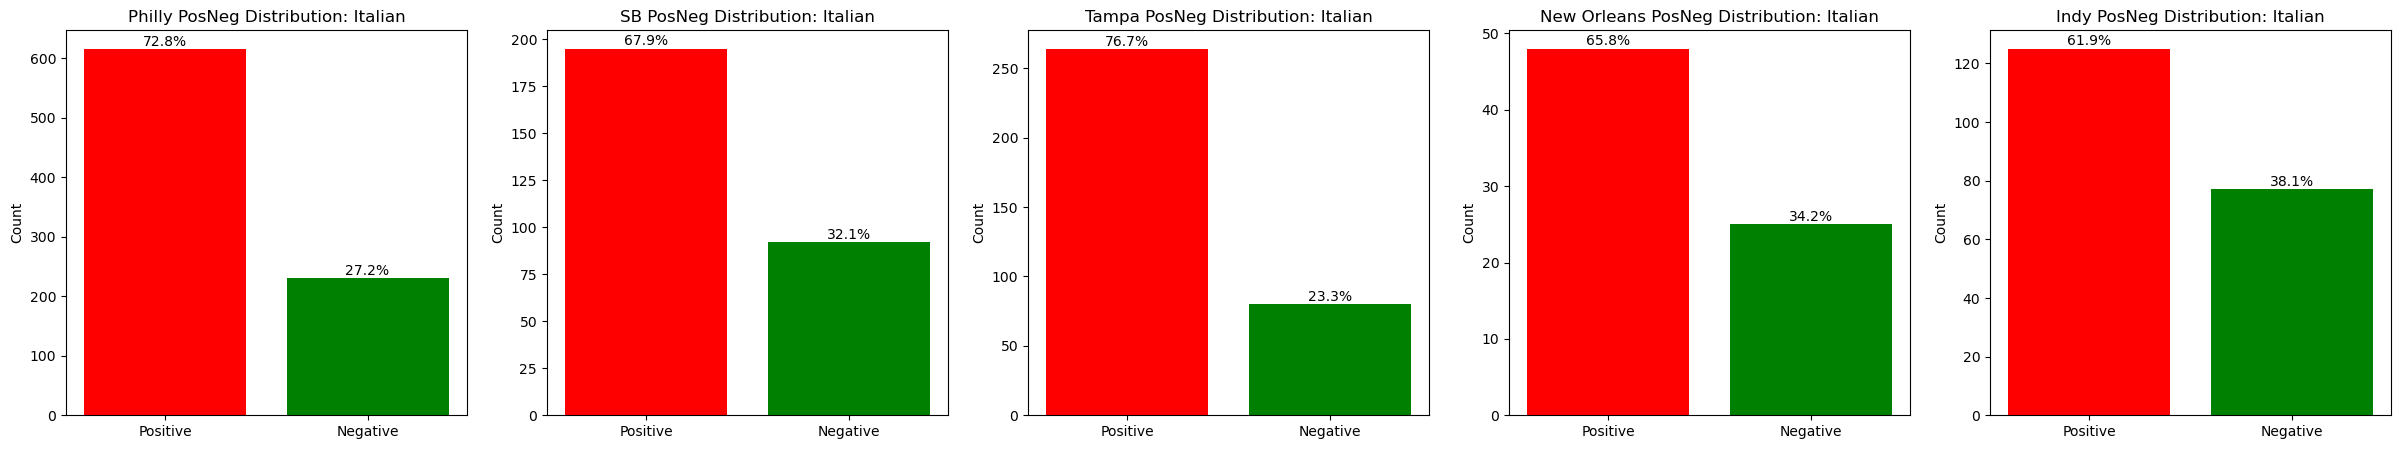

In [78]:
get_cuisine_visualization_posneg("Italian")

# Testing

#### Chi-Square Between Cities

In [132]:
def chi_square_check(citya_positive, cityb_positive):
    a_pos, a_neg = citya_positive, 100-citya_positive
    b_pos, b_neg = cityb_positive, 100-cityb_positive
    observed_data = np.array([[a_pos, a_neg],
                            [b_pos, b_neg]])
    chi2, p, dof, expected = chi2_contingency(observed_data)
    #print(f"Chi-Square Value: {chi2}")
    #print(f"P-Value: {p}")
    return p
    #print(f"Degrees of Freedom: {dof}")
    #print("Contingency Table:")
    #print(expected) 

In [192]:
#FOR CHINESE
negative_scores = {"SB":[42,27.3], "PH":[26.2, 27.4], "TMP":[27.1, 29.4], "NO":[45.1, 27.5], "IND":[45.2,31]}
cities = ["PH", "SB", "TMP", "NO", "IND"]
chi_square_p_vals = []
for city1 in cities:
    p_vals = []
    for city2 in cities:
        if negative_scores[city1]==negative_scores[city2]: p_vals.append("1.000")
        else: 
            if chi_square_check(negative_scores[city1][0], negative_scores[city2][0]) == 1.0: p_vals.append("1.000")
            else:p_vals.append(round(chi_square_check(negative_scores[city1][0], negative_scores[city2][0]),3))
    chi_square_p_vals.append(p_vals)

print("     PH    ", "SB    ", "TMP   ", "NO   ", " IND   ")
for row in range(len(chi_square_p_vals)):
    space = " "*(5-len(cities[row]))
    print(cities[row]+space, end='')
    print(*chi_square_p_vals[row],sep="  "),
    print(" ")

     PH     SB     TMP    NO     IND   
PH   1.000  0.027  1.000  0.008  0.008
 
SB   0.027  1.000  0.039  0.765  0.754
 
TMP  1.000  0.039  1.000  0.012  0.012
 
NO   0.008  0.765  0.012  1.000  1.000
 
IND  0.008  0.754  0.012  1.000  1.000
 


In [201]:
#FOR OVERALL 
chi_square_p_vals = []
for city1 in cities:
    p_vals = []
    for city2 in cities:
        if negative_scores[city1]==negative_scores[city2]: p_vals.append("1.00")
        else: 
            if chi_square_check(negative_scores[city1][1], negative_scores[city2][1])==1.0:p_vals.append("1.00") 
            else:p_vals.append(round(chi_square_check(negative_scores[city1][1], negative_scores[city2][1]),2))
    chi_square_p_vals.append(p_vals)

print("     PH   ", " SB    ", "TMP   ", "NO    ", "IND   ")
for row in range(len(chi_square_p_vals)):
    space = " "*(5-len(cities[row]))
    print(cities[row]+space, end='')
    print(*chi_square_p_vals[row],sep="   "),
    print(" ")

     PH     SB     TMP    NO     IND   
PH   1.00   1.00   0.88   1.00   0.69
 
SB   1.00   1.00   0.86   1.00   0.67
 
TMP  0.88   0.86   1.00   0.89   0.93
 
NO   1.00   1.00   0.89   1.00   0.7
 
IND  0.69   0.67   0.93   0.7   1.00
 


#### Pearson Correlation Coefficient, Diversity Index (DI) and Negative Reviews for Chinese Restaurants

In [214]:
alpha = 0.05
#philly, sb, tampa, newor, indy
neg_review_ratio = [26.2, 42.0, 27.1, 45.1, 45.2]
div = [0.689562, 0.55874, 0.68144, 0.56415, 0.62]
correlation, p_value = scipy.stats.pearsonr(neg_review_ratio, div)
print("Correlation coefficient: ",correlation)
print("P-value: ", p_value)
if p_value >= alpha:
    print("We fail to reject the null hypothesis: There is no significant relationship between the diversity index (DI) of a city and its negative review ratio for Chinese restaurants")
else:
    if correlation < 0: 
        print("We reject the null hypothesis.")
        print("There is a negative relationship between the diversity index (DI) of a city and its negative review ratio for Chinese restaurants. ")
    else:
        print("We reject the null hypothesis.")
        print("There is a positive linear relationship between the diversity index (DI) of a city and its negative review ratio for Chinese restaurants'i'.")

Correlation coefficient:  -0.8838230772705964
P-value:  0.046697854236814426
We reject the null hypothesis.
There is a negative relationship between the diversity index (DI) of a city and its negative review ratio for Chinese restaurants. 
0.175


In [213]:
tau, p_value = scipy.stats.kendalltau(neg_review_ratio, div, alternative= "less")
tau

-0.39999999999999997

#### One Proportion Z-Tests (Negative Sentiment for Chinese Restaurants vs Overall)

In [210]:

from statsmodels.stats.proportion import proportions_ztest

def z_test(title,data_size, sample_neg_ratio, population_proportion):
    neg_ratio = sample_neg_ratio*data_size 
    z_statistic, p_value = proportions_ztest(neg_ratio, data_size, population_proportion)
    print("----------------------------------")
    print("RESULTS FOR:", title)
    print(f"Z-statistic: {z_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05 :
        print("The null hypothesis is rejected.")
        print("There is a significant difference in the population proportion of negative results and the proportion of negative results for Chinese restaurants.")
    else:
        print("The null hypothesis cannot be rejected.")
        print("There is no significant difference in the population proportion of negative results and the proportion of negative results for Chinese restaurants.")

z_test("PHILADELPHIA", len(philly_revs.query("cuisine=='Chinese'")), 0.262, 0.273)
z_test("SANTA BARBARA", len(sb_revs.query("cuisine=='Chinese'")), 0.42, 0.274)
z_test("TAMPA", len(tampa_revs.query("cuisine=='Chinese'")), 0.271, 0.294)
z_test("NEW ORLEANS",  len(newo_revs.query("cuisine=='Chinese'")), 0.451, 0.275)
z_test("INDIANAPOLIS",  len(indy_revs.query("cuisine=='Chinese'")), 0.452, 0.31)

----------------------------------
RESULTS FOR: PHILADELPHIA
Z-statistic: -0.43400737193181965
P-value: 0.6642830877759449
The null hypothesis cannot be rejected.
There is no significant difference in the population proportion of negative results and the proportion of negative results for Chinese restaurants.
----------------------------------
RESULTS FOR: SANTA BARBARA
Z-statistic: 4.183398261947144
P-value: 2.8718364119367953e-05
The null hypothesis is rejected.
There is a significant difference in the population proportion of negative results and the proportion of negative results for Chinese restaurants.
----------------------------------
RESULTS FOR: TAMPA
Z-statistic: -0.7761947223504488
P-value: 0.43763402177949373
The null hypothesis cannot be rejected.
There is no significant difference in the population proportion of negative results and the proportion of negative results for Chinese restaurants.
----------------------------------
RESULTS FOR: NEW ORLEANS
Z-statistic: 2.52594

In [277]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
def polarity_t_test(name, df1, df2, query, g1):
    subset1 = df1.query(query)
    subset2 = df2.query(query)
    scorings1 = []
    scorings2 = []
    for index, row in subset1.iterrows(): scorings1.append(sid.polarity_scores(row['text'])['compound'])
    for index, row in subset2.iterrows(): scorings2.append(sid.polarity_scores(row['text'])['compound'])
    t_statistic, p_value = scipy.stats.ttest_ind(scorings1, scorings2, equal_var = False, alternative='greater')
    alpha = 0.05
    if p_value < alpha:
        print(name+"Reject the null hypothesis. There is evidence that the mean sentiment of",g1,"is greater. p-val: ", p_value)
    else:
        print(name+"Fail to reject the null hypothesis. The sentiment is not significantly different. p-val: ", p_value)
print("PHILADELPHIA VS. ")
polarity_t_test("Tampa: ", philly_revs,tampa_revs, "cuisine=='Chinese'", 'Philly')
polarity_t_test("SB: ", philly_revs,sb_revs, "cuisine=='Chinese'", 'Philly' )
polarity_t_test("Indy: ", philly_revs,indy_revs, "cuisine=='Chinese'", 'Philly' )
polarity_t_test("NewO: ", philly_revs,newo_revs, "cuisine=='Chinese'" , 'Philly')
print("-----------------------------------------------------")
print("SB VS. ")
polarity_t_test("Tampa: ", tampa_revs,sb_revs, "cuisine=='Chinese'", 'Tampa' )
polarity_t_test("Indy: ",sb_revs,indy_revs, "cuisine=='Chinese'", 'SB' )
polarity_t_test("NewO: ",sb_revs,newo_revs, "cuisine=='Chinese'", 'New Orleans')
print("-----------------------------------------------------")
print("TAMPA VS. ")
polarity_t_test("Indy: ",tampa_revs,indy_revs, "cuisine=='Chinese'" , 'Tampa')
polarity_t_test("NewO: ",tampa_revs,newo_revs, "cuisine=='Chinese'", 'Tampa' )
print("-----------------------------------------------------")
print("NEW ORLEANS VS. ")
polarity_t_test("Indy: ",newo_revs,indy_revs, "cuisine=='Chinese'",'New Orleans' )


PHILADELPHIA VS. 
Tampa: Fail to reject the null hypothesis. The sentiment is not significantly different. p-val:  0.6923036965964579
SB: Reject the null hypothesis. There is evidence that the mean sentiment of Philly is greater. p-val:  0.012558368055929761
Indy: Reject the null hypothesis. There is evidence that the mean sentiment of Philly is greater. p-val:  0.00022518084797909407
NewO: Reject the null hypothesis. There is evidence that the mean sentiment of Philly is greater. p-val:  0.012697148675783244
-----------------------------------------------------
SB VS. 
Tampa: Reject the null hypothesis. There is evidence that the mean sentiment of Tampa is greater. p-val:  0.004373366242384097
Indy: Fail to reject the null hypothesis. The sentiment is not significantly different. p-val:  0.12734308712300701
NewO: Fail to reject the null hypothesis. The sentiment is not significantly different. p-val:  0.1505936409711519
-----------------------------------------------------
TAMPA VS. 
